<a href="https://colab.research.google.com/github/adityanandy2802/ml-dl-task/blob/main/SRIP_TASK_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

### Entropy:
$Entropy = - \Sigma p(x) \log p(x)$

We first start by defining our normal distribution class.

In [2]:
class normal_dist():
  def __init__(self, s=0, m=0):
    self.s=s
    self.m=m
  
  def func(self, x: torch.Tensor) -> torch.Tensor:
    y = (1/(self.s * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x-self.m)/self.s)**2)
    return y 

We specify our domain `[0.02, 10)`.
We set $\sigma=1, \mu=5$ for our distribution

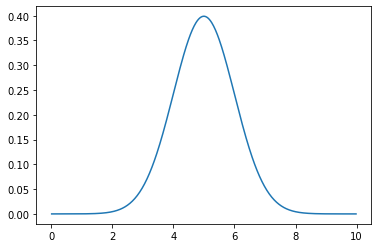

In [3]:
x=torch.arange(0.02,10,0.02)
sdev=1
mean=5
dist_=normal_dist(sdev, mean)
y=dist_.func(x)

plt.plot(x,y)
plt.show()

We define our function and get the result

In [4]:
def entropy(y):
  entropy=torch.sum(-1*y*np.log(y))
  return entropy
entropy(y)

tensor(70.9465)

### Mutual Information
$Mutual Information=\Sigma\Sigma p(x,y) \log\frac{p(x,y)}{p(x)p(y)}$

In [5]:
import random
x=[]
y=[]
x_list=[0,1]
y_list=[0,1]
# We define 2 arrays with random values between 0 and 1
for i in range(10):
  x.append(random.choice(x_list))
  y.append(random.choice(y_list))
x=torch.tensor(x)
y=torch.tensor(y)

# We define the joint probability p(x,y) below
def joint_prob(x:torch.Tensor,y:torch.Tensor,val_x,val_y) -> float:
  sum=0.0
  for i in range(x.shape[0]):
    if (x[i]==val_x and y[i]==val_y):
      sum+=1
  return sum/x.shape[0]

# We define the marginal probability p(x) below
def marginal_prob(x:torch.Tensor, val_x) -> float:
  sum=0.0
  for i in range(x.shape[0]):
    if (x[i]==val_x):
      sum+=1
  return sum/x.shape[0]

#From joint and marginal probabilities we get our mutual information
def mutual_info(x:torch.Tensor,y:torch.Tensor) -> float:
  val=0.0
  for i in range(len(x_list)):
    for j in range(len(y_list)):
      joint=joint_prob(x,y,x_list[i],y_list[j])
      marginal_x=marginal_prob(x,x_list[i])
      marginal_y=marginal_prob(y,y_list[j])

      if (joint == 0 or marginal_x == 0 or marginal_y==0):
        val+=0
      else:
        val+=joint*np.log(joint/(marginal_x * marginal_y))/np.log(2)
  return val

mutual_info(x,y), x,y

(0.26899559358928105,
 tensor([1, 1, 1, 1, 1, 0, 1, 1, 1, 1]),
 tensor([0, 0, 0, 0, 1, 1, 0, 0, 0, 0]))

###Cross Entropy
$CrossEntropy=-\Sigma p(x)\log q(x)$

In [10]:
x=torch.rand(100000)
y=torch.rand(100000)
def cross_entropy(x,y) -> torch.Tensor:
  return -torch.sum(x*np.log(y))
cross_entropy(x,y)

tensor(49998.8633)

### KL Divergence
$KLDivergence=\Sigma P(i) \log\frac{P(i)}{Q(i)}$

In [12]:
real=[]

#We fill a list with 0 or 1 with random chance
for i in range(10):
  real.append(random.choice([0,1]))

# We then create a real model, a 1st predicted model, and a 2nd predicted model
real_model={1: 0.6, 0:0.4}
predicted_model_1={1:0.95, 0:0.05}
predicted_model_2={1:0.55, 0:0.45}

real

[0, 1, 0, 0, 1, 1, 1, 1, 1, 0]

The 2nd model is much closer to the actual model. Hence the KL Divergence is very close to 0.

In [13]:
def kl_div(real, real_model, predicted_model):
  val=0.0
  for i in real:
    p=real_model[i]
    q=predicted_model[i]
    val+=p*np.log(p/q)
  return val

kl_div(real, real_model,predicted_model_1), kl_div(real, real_model, predicted_model_2)

(2.679608527470907, -0.07520950809732199)